## Movie Genre

### Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Read the dataset

In [2]:
df=pd.read_csv('movie_data (1).csv')[:1000]

## view head

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Print some of the texts along with its sentiments

In [4]:
for i in range(5):
    print(df['review'][i],'-',df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### View info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,sentiment
count,1000.000000
mean,0.501000
std,0.500249
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Check for null values

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### Check for duplicated values

In [8]:
df.duplicated().sum()

0

### Drop duplicated values

In [9]:
df.drop_duplicates(inplace=True,keep='first')

In [10]:
df.duplicated().sum()

0

### Plot a countplot of 'Emotions'

<Axes: xlabel='count', ylabel='sentiment'>

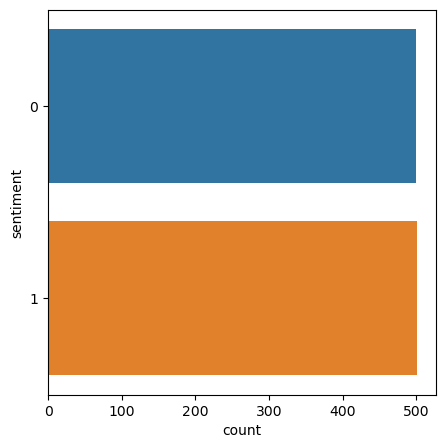

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y=df['sentiment'])

### Create a function to preprocess the text

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [13]:
def preprocessing(sentence):
    text=re.sub(r"[^a-zA_Z0-9]",' ',sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma=WordNetLemmatizer()
    word=[lemma.lemmatize(word,'v')for word in words]
    word=' '.join(word)
    return words


### Apply the function on Text column

In [14]:
df['review']=df['review'].apply(preprocessing)

### Print some of the texts after the preprocess

In [15]:
for i in range(5):
    print(df['review'][i],'-',df['sentiment'][i])
    print()

['movie', 'crap', 'ven', 'though', 'directors', 'claim', 'part', 'oi', 'culture', 'still', 'bad', 'directorial', 'debut', 'topic', 'interesting', 'accept', 'bad', 'acting', 'due', 'fact', 'amateurs', 'never', 'acted', 'worst', 'thing', 'film', 'dialogs', 'unexperienced', 'naive', 'directing', 'timing', 'movie', 'felt', 'like', 'directors', 'exited', 'movie', 'first', 'feature', 'actually', 'never', 'really', 'asked', 'story', 'wanna', 'tell', 'met', 'en', 'one', 'directors', 'several', 'occasions', 'nice', 'thoughtful', 'guy', 'make', 'director', 'think', 'american', 'istory', 'full', 'clich', 'somehow', 'manages', 'transport', 'story', 'arning', 'full', 'clich', 'tell', 'anything', 'new', 'provocative', 'sad', 'thing', 'movie', 'far', 'eality', 'br', 'br', 'f', 'wanna', 'see', 'weird', 'great', 'erman', 'films', 'watch', 'movies', 'ichael', 'aneke', 'hristoph', 'chlingensief', 'skar', 'oehler', 'ans', 'eingartner', 'liver', 'irschbiegel', 'br', 'br', 'enny', 'ideo', 'unny', 'ames', 'i

### Split the dataset into Input and Target Variables

In [16]:
x=df['review']
y=df['sentiment']

In [17]:
y

0      0
1      1
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    1
Name: sentiment, Length: 1000, dtype: int64

### Split the dataset into Training and Testing Set

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

### Convert text to Sequence and add padding

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [21]:
tokenizer=Tokenizer(num_words=500)

#### "fit_on_texts" - This method creates the vocabulary index based on word frequency. Each word gets a unique id

In [22]:
tokenizer.fit_on_texts(x_train)
vocab_size=len(tokenizer.word_index)+1
vocab_size

18306

### Apply the function on both Training and Testing set

In [23]:
def text_encoded(txt):
    encoded_text=tokenizer.texts_to_sequences(txt)
    pad_sequence=pad_sequences(encoded_text,maxlen=128)
    return pad_sequence

In [24]:
x_train=text_encoded(x_train)
x_test=text_encoded(x_test)

### Create a keras Sequential model with LSTM Layers

In [25]:
from keras import Sequential,layers

### Embedding layer:
Vocab size: Number of unique words in our training set

Second argument (In this case "128" is the size of each embedding vectors

In [26]:
model=Sequential()
model.add(layers.Embedding(vocab_size,128))


model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.Dropout(0.02))

model.add(layers.LSTM(128))
model.add(layers.Dropout(0.02))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.02))

model.add(layers.Dense(1,activation='softmax'))

### Compile the model

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model

In [28]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 15s 342ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_loss: 0.0000e+00 - val_accuracy: 0.6122
Epoch 2/10
30/30 [==============================] - 9s 313ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_loss: 0.0000e+00 - val_accuracy: 0.6122
Epoch 3/10
30/30 [==============================] - 9s 296ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_loss: 0.0000e+00 - val_accuracy: 0.6122
Epoch 4/10
30/30 [==============================] - 9s 299ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_loss: 0.0000e+00 - val_accuracy: 0.6122
Epoch 5/10
30/30 [==============================] - 9s 296ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_loss: 0.0000e+00 - val_accuracy: 0.6122
Epoch 6/10
30/30 [==============================] - 9s 295ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_loss: 0.0000e+00 - val_accuracy: 0.6122
Epoch 7/10
30/30 [==============================] - 9s 296ms/step - loss: 0.0000e+00 - accuracy: 0.4973 - val_

### Make Prediction with X_test

In [29]:
y_pred=model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [30]:
y_pred=[np.argmax(i)for i in y_pred]

### Model Evaluation

In [31]:
model.evaluate(x_train,y_train)

31/31 [==============================] - 4s 127ms/step - loss: 0.0000e+00 - accuracy: 0.5031


[0.0, 0.5030612349510193]

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Accuracy score

In [33]:
accuracy_score(y_test,y_pred)

0.6

### Confusion Matrix

<Axes: >

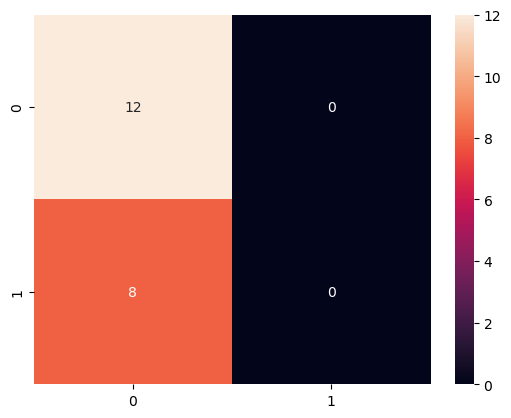

In [34]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Classification report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
